# Data Preparation For Final Training

The datasets contain three different type of resource.

1. Resource from RTL resource.
2. Resource from dictionary sample sentence.
3. Resource from RTL resource 2024.


In [ ]:
import pandas as pd


test_df = pd.read_json('data/source/dic.jsonl', lines=True)

print (f"Drop NA Before: {len(test_df)}")
test_df.dropna(subset=["sentence"], inplace=True)
print (f"Drop NA After: {len(test_df)}")
test_df["sentence"] = test_df["sentence"].str.strip().str.capitalize()

Drop NA Before: 56376
Drop NA After: 56376


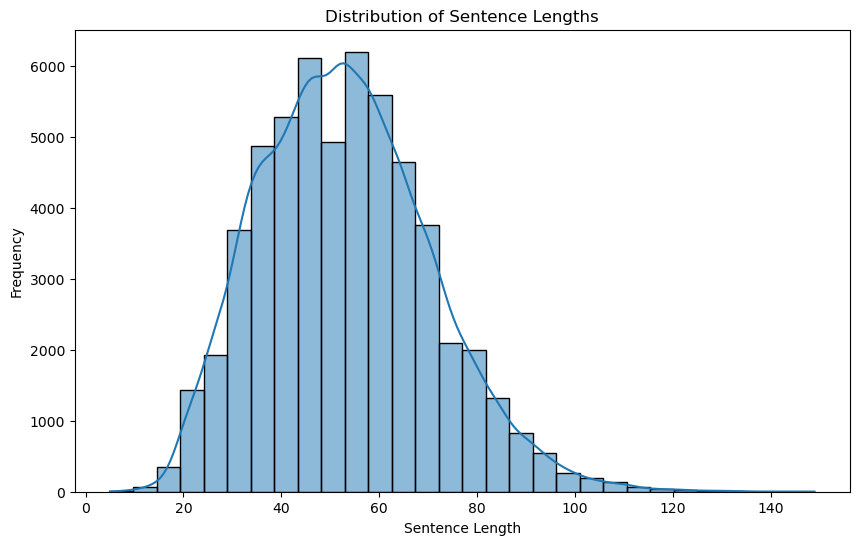

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

test_df["sentence_length"] = test_df["sentence"].str.len()

plt.figure(figsize=(10, 6))
sns.histplot(test_df["sentence_length"], bins=30, kde=True)
plt.xlabel("Sentence Length")
plt.ylabel("Frequency")
plt.title("Distribution of Sentence Lengths")
plt.show()

In [ ]:
test_df.to_json("data/processed/dic_sentences.jsonl", orient="records", lines=True)


In [21]:
filtered_output_df = pd.read_csv('data/source/filtered_output 1.csv')
filtered_output_df["content"] = filtered_output_df["content"].astype(str)
print(len(filtered_output_df))
filtered_output_df = filtered_output_df[~filtered_output_df["content"].str.contains("LINK", case=True, na=False)]
print(len(filtered_output_df))

20541
20374


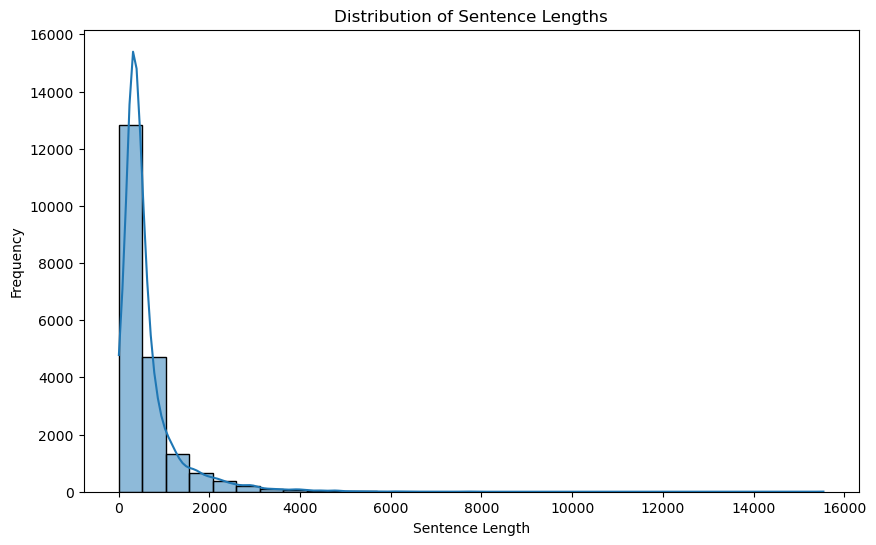

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

filtered_output_df["sentence_length"] = filtered_output_df["content"].str.len()

plt.figure(figsize=(10, 6))
sns.histplot(filtered_output_df["sentence_length"], bins=30, kde=True)
plt.xlabel("Sentence Length")
plt.ylabel("Frequency")
plt.title("Distribution of Sentence Lengths")
plt.show()

In [23]:
filtered_output_df

,url,date_info,content,content_list,error,sentence_length
0,https://www.rtl.lu/mobiliteit/news/a/2160001.html,2024-01-23,Wéi? Dat weess ënnert anerem d'Ligue Luxembour...,"[""Wéi? Dat weess ënnert anerem d'Ligue Luxembo...",NONE,1318
1,https://www.rtl.lu/mobiliteit/news/a/2160002.html,2024-01-19,Dëst Joer gouf den ieweschte Rabbiner Pinchas ...,['Dëst Joer gouf den ieweschte Rabbiner Pincha...,NONE,1074
2,https://www.rtl.lu/mobiliteit/news/a/2160008.html,2024-01-19,Dëst Joer gouf den ieweschte Rabbiner Pinchas ...,['Dëst Joer gouf den ieweschte Rabbiner Pincha...,NONE,726
3,https://www.rtl.lu/mobiliteit/news/a/2160009.html,2024-01-19,Um Donneschdeg ass den TICE am Minett op 10 Li...,"[""Um Donneschdeg ass den TICE am Minett op 10 ...",NONE,1745
4,https://www.rtl.lu/mobiliteit/news/a/2160023.html,2024-01-19,En deementspriechend Gesetz krut de Mëtte grén...,"[""En deementspriechend Gesetz krut de Mëtte gr...",NONE,212
...,...,...,...,...,...,...
20534,https://www.rtl.lu/mobiliteit/news/a/2260859.html,2024-12-19,"An de Konventioune vun ""Hëllef um Terrain"" mat...","['An de Konventioune vun ""Hëllef um Terrain"" m...",NONE,1048
20535,https://www.rtl.lu/mobiliteit/news/a/2260866.html,2024-12-19,Fir de Mord un engem Sans-Abri am Englesche Ga...,"[""Fir de Mord un engem Sans-Abri am Englesche ...",NONE,331
20538,https://www.rtl.lu/mobiliteit/news/a/2260891.html,2024-12-19,D’Inselgrupp am indeschen Ozean gouf e Sonndeg...,['D’Inselgrupp am indeschen Ozean gouf e Sonnd...,NONE,722
20539,https://www.rtl.lu/mobiliteit/news/a/2260892.html,2024-12-19,"Den Ahmed al Sharaa, fréier bekannt als al-Dsc...","['Den Ahmed al Sharaa, fréier bekannt als al-D...",NONE,476
